#  Data Analytics Final Project


---

## Project Title:
***Health and Lifestyle Risk Analysis***

---

## Project Summary:
The objective of this project is to analyze a synthetic health and lifestyle dataset to identify the key factors influencing an individual’s overall health risk.  
This analysis will explore how variables such as **exercise frequency, sleep duration, sugar intake, BMI, smoking, and alcohol habits** affect the likelihood of being classified as *high* or *low* health risk.  
Through data cleaning, exploratory data analysis (EDA), and visualizations, we aim to uncover meaningful lifestyle patterns and provide actionable insights for wellness improvement.

---

##  Dataset Information:
- **Dataset Name:** Synthetic Health & Lifestyle Dataset  
- **Source:** [Kaggle – by Arif Miah](https://www.kaggle.com/datasets/arifmiah/health-and-lifestyle-dataset)   
- **Author:** Arif Miah (Machine Learning Engineer, - Kaggle Expert)
-  License: CC0 (Public Domain)
- **Rows:** 5,000  
- **Columns:** 12  
- **Data Type:** Mixed (Numerical + Categorical)  

---



##  Project Goals:
- Analyze and interpret lifestyle factors influencing overall health risk.

- Explore variables such as Exercise, Sleep, Sugar Intake, BMI, Smoking, and Alcohol habits.

- Perform EDA, statistical summaries, and visualizations to uncover patterns.

- Support preventive health awareness and data-informed lifestyle recommendations.

## Task 1: Dataset Overview & Initial Exploration


---
**Objective:**

Understand the dataset structure, types, and initial characteristics before cleaning or analysis.



---
**Steps Completed**:

- Loaded dataset using Pandas.

- Checked shape: number of rows and columns.

- Viewed first few rows using head().

- Examined data types of each column with info().

- Generated summary statistics for numerical columns using describe().

- Checked number of unique values in each column with nunique().


---
**Outcome**:

- Dataset successfully loaded and explored.

- Identified missing values, duplicates, and inconsistent formatting for cleaning in Task 2.

- Initial understanding of variables ready for detailed analysis.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/DA Final Project/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv'

df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape[0], "rows,", df.shape[1], "columns")
df.head()

Mounted at /content/drive
Dataset Loaded Successfully!
Shape of dataset: 5000 rows, 12 columns


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [ ]:
# Quick Data Summary
df.info()
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


,0
age,62
weight,65
height,55
exercise,4
sleep,71
sugar_intake,3
smoking,2
alcohol,2
married,2
profession,8


# Task 2: Data Cleaning & Preprocessing


---


**Objective:**

Prepare the dataset for analysis by handling missing values, correcting data types, creating derived columns, filtering unrealistic values, and generating aggregated summaries for initial insights.

---

**Steps Completed:**

- Checked missing values using isnull().sum().

- Filled missing values:

  - Numeric columns (Age, Weight, Height, Sleep, BMI) filled with mean values.

  - Categorical columns (Exercise, Smoking, Alcohol, Married, Profession, Health Risk, Sugar Intake) cleaned for consistency: stripped spaces, capitalized values.

- Removed duplicate rows using drop_duplicates().

- Corrected data types:

  -  Numeric columns converted to appropriate numeric types.

  - Categorical columns converted to category type.

- Created derived columns:

  - BMI_Category: Underweight, Normal, Overweight, Obese (based on BMI).

  - Sleep_Category: Very Low, Low, Optimal, High (based on Sleep hours).

- Filtered unrealistic values:

      Age between 18–80

      BMI between 10–60

      Sleep between 0–12 hours

- Aggregated Insights:

  - Average BMI by Health Risk: High-risk individuals have higher BMI(28.8) vs Low-risk (22.3).

  - Count of people in each Sleep Category: Most people are in Low (2,150) or Optimal (2,012) sleep categories.

  - Average Sleep Duration by Exercise Frequency: Sleep duration is fairly consistent (7 hours) across exercise levels.

  - Count of people by Profession: Distribution is balanced across professions (e.g., Student 644, Farmer 639, Doctor 630, Office_worker 602).


---


**Outcome:**

- Dataset cleaned, formatted, and ready for detailed EDA.

- Derived columns and aggregated summaries provide initial insights into health patterns and lifestyle factors.

- Established a foundation for data-driven analysis and visualization in Task 3.



In [7]:

# Data Cleaning

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing values for numeric columns only
numeric_cols = ['age','weight','height','sleep','bmi']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Remove duplicate rows
df = df.drop_duplicates()

# Correct data types
categorical_cols = ['exercise','smoking','alcohol','married','profession','health_risk','sugar_intake']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Clean categorical columns (strip spaces and capitalize)
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.capitalize()

# Create derived columns
df['BMI_Category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, 60],
    labels=['Underweight','Normal','Overweight','Obese']
)

df['Sleep_Category'] = pd.cut(
    df['sleep'],
    bins=[0, 5, 7, 9, 24],
    labels=['Very Low','Low','Optimal','High']
)

# Filter unrealistic values
df = df[(df['age'] >= 18) & (df['age'] <= 80)]
df = df[(df['bmi'] > 10) & (df['bmi'] < 60)]
df = df[(df['sleep'] >= 0) & (df['sleep'] <= 12)]

# Derived column Lifestyle_score_raw
exercise_points = {'None':0, 'Rarely':1, 'Sometimes':2, 'Often':3, 'Daily':4}
sugar_points = {'Low':1, 'Medium':2, 'High':3}
smoking_points = {'Yes':2, 'No':0}
alcohol_points = {'Yes':1, 'No':0}

df['Lifestyle_score_raw'] = (
    df['exercise'].map(exercise_points).fillna(0)
    - df['sugar_intake'].map(sugar_points).fillna(0)
    - df['smoking'].map(smoking_points).fillna(0)
    - df['alcohol'].map(alcohol_points).fillna(0)
)

# Rescale Lifestyle score to 0-10 using min-max scaling
min_score = df['Lifestyle_score_raw'].min()
max_score = df['Lifestyle_score_raw'].max()
df['Lifestyle_score'] = ((df['Lifestyle_score_raw'] - min_score) / (max_score - min_score) * 10).round(1)

df[['exercise','sugar_intake','smoking','alcohol','Lifestyle_score']].head()

#  Aggregated Insights

# Average BMI by Health Risk
avg_bmi_by_risk = df.groupby('health_risk')['bmi'].mean().reset_index()
print(" Average BMI by Health Risk:")
print(avg_bmi_by_risk)

# Count of people in each Sleep Category
sleep_counts = df['Sleep_Category'].value_counts()
print("\n Number of people in each Sleep Category:")
print(sleep_counts)

# Average Sleep Duration by Exercise Frequency
avg_sleep_by_exercise = df.groupby('exercise')['sleep'].mean().reset_index()
print("\n Average Sleep Duration by Exercise Frequency:")
print(avg_sleep_by_exercise)

# Count of people by Profession
profession_counts = df['profession'].value_counts()
print("\n Number of people by Profession:")
print(profession_counts)
df.head()

Missing values:
 age                    0
weight                 0
height                 0
exercise               0
sleep                  0
sugar_intake           0
smoking                0
alcohol                0
married                0
profession             0
bmi                    0
health_risk            0
BMI_Category           0
Sleep_Category         0
Lifestyle_score_raw    0
Lifestyle_score        0
dtype: int64
 Average BMI by Health Risk:
  health_risk        bmi
0        High  28.791576
1         Low  22.342252

 Number of people in each Sleep Category:
Sleep_Category
Low         2150
Optimal     2012
Very Low     421
High         417
Name: count, dtype: int64

 Average Sleep Duration by Exercise Frequency:
  exercise     sleep
0     High  7.044500
1      Low  6.964623
2   Medium  6.975365
3     None  7.046703

 Number of people by Profession:
profession
Student          644
Farmer           639
Driver           631
Doctor           630
Artist           626
Engineer   

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,BMI_Category,Sleep_Category,Lifestyle_score_raw,Lifestyle_score
0,56,67,195,Low,6.1,Medium,Yes,Yes,Yes,Office_worker,17.6,High,Underweight,Low,-5.0,2.0
1,69,76,170,High,6.9,High,No,No,No,Teacher,26.3,High,Overweight,Low,-3.0,6.0
2,46,106,153,High,6.6,Low,Yes,No,No,Artist,45.3,High,Obese,Low,-3.0,6.0
3,32,54,186,Medium,8.5,Medium,No,No,No,Artist,15.6,Low,Underweight,Optimal,-2.0,8.0
4,60,98,195,High,8.0,Low,No,No,Yes,Teacher,25.8,High,Overweight,Optimal,-1.0,10.0


# Task 3: Exploratory Data Analysis (EDA) & Visualizations


---


**Objective:**

The purpose of this task was to perform a comprehensive exploratory data analysis to uncover patterns, trends, and relationships in the health and lifestyle dataset. The analysis includes univariate, bivariate, and multivariate examinations with meaningful visualizations to interpret the data effectively.


---


1. **Univariate Analysis**

- Explored distributions of numerical variables such as Age, BMI, Sleep Hours, and Lifestyle Score using histograms and KDE plots.

- Examined categorical variables including Exercise Frequency, Sugar Intake, Smoking, Alcohol Consumption, and Health Risk using countplots.

- Purpose: Identify the spread, central tendency, and category proportions within the dataset.


---



2. **Bivariate Analysis**

- Analyzed relationships between numerical and categorical variables:

  - BMI vs Health Risk (boxplot)

  - Sleep vs Health Risk (boxplot)

  - Lifestyle Score vs Health Risk (boxplot)

  - Explored categorical vs categorical interactions:

  - Exercise vs Health Risk (countplot with hue)

  - Sugar Intake vs Health Risk (countplot with hue)

- Purpose: Understand how lifestyle habits and demographic factors correlate with health risk.
---
3. **Multivariate Analysis**


- Examined interactions across multiple variables:

  - BMI vs Sleep Hours, colored by Health Risk (scatterplot)

  - Lifestyle Score vs Health Risk by Exercise Level (stacked bar chart)

  - Correlation Heatmap of numerical features including Age, Weight, Height, Sleep, BMI, and Lifestyle Score

  - Pairplot of Age, Sleep, BMI, Lifestyle Score, and Health Risk

- Purpose: Identify patterns and correlations that involve more than two variables to gain deeper insights into health risk factors.




---



**Outcome:**

Task 3 successfully explored and visualized the dataset, providing a clear understanding of the distributions, relationships, and trends in health and lifestyle factors. All key variables were analyzed equally to support meaningful interpretations and actionable insights.

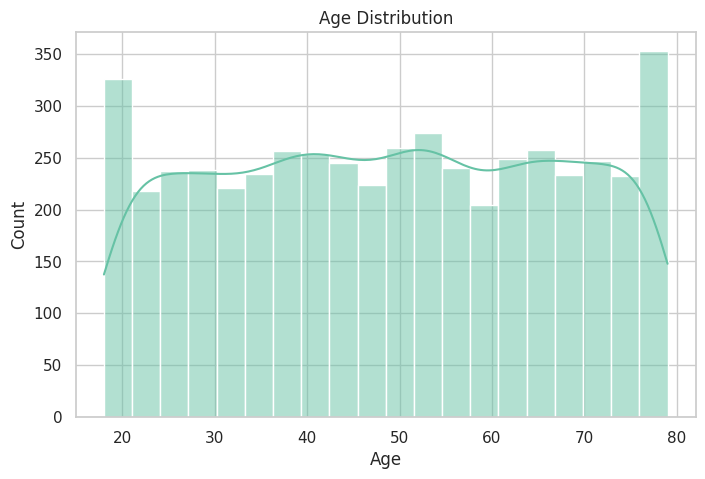

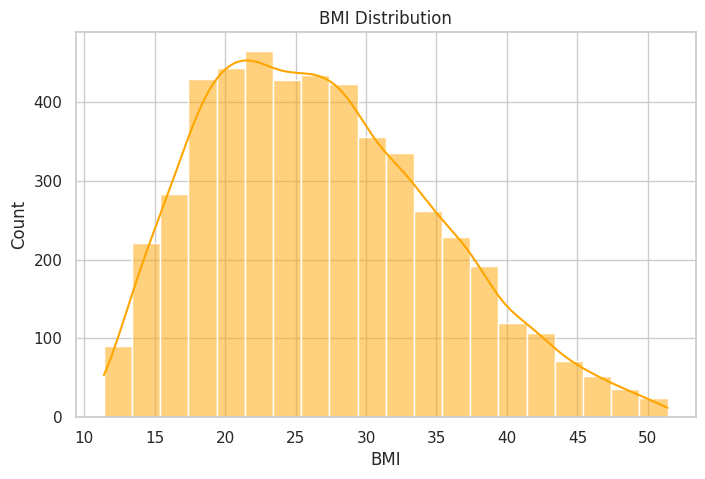

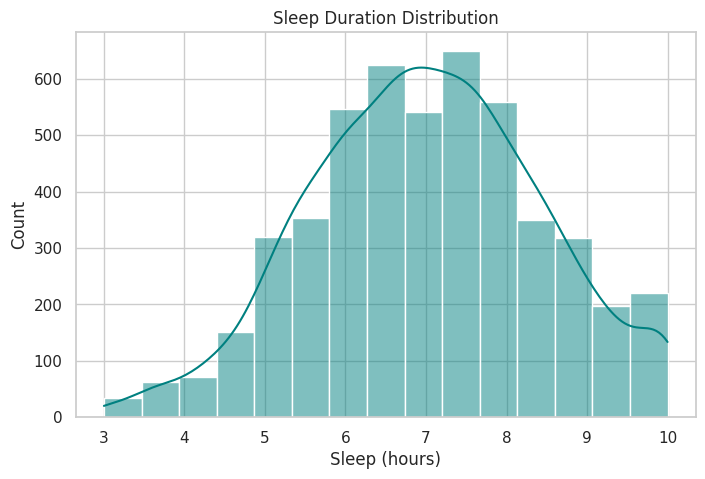

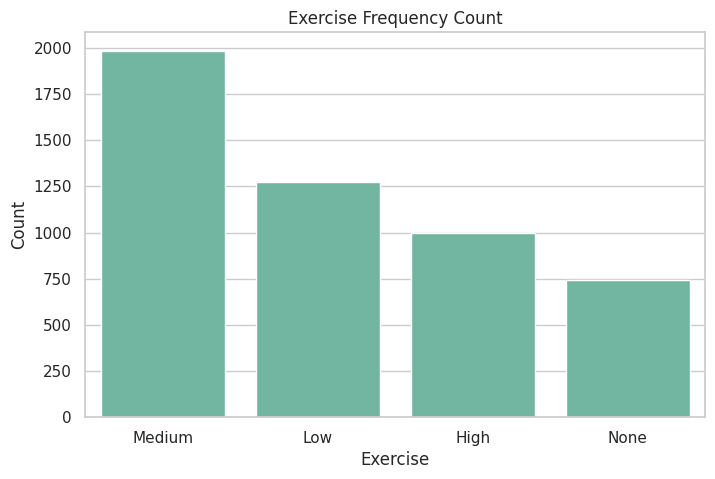

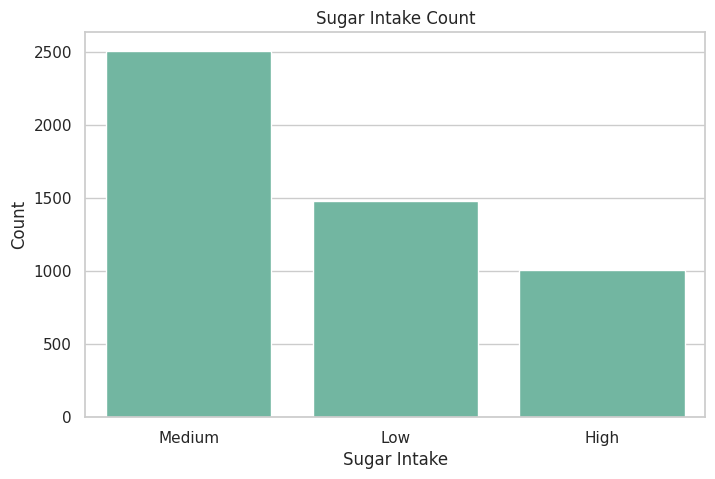

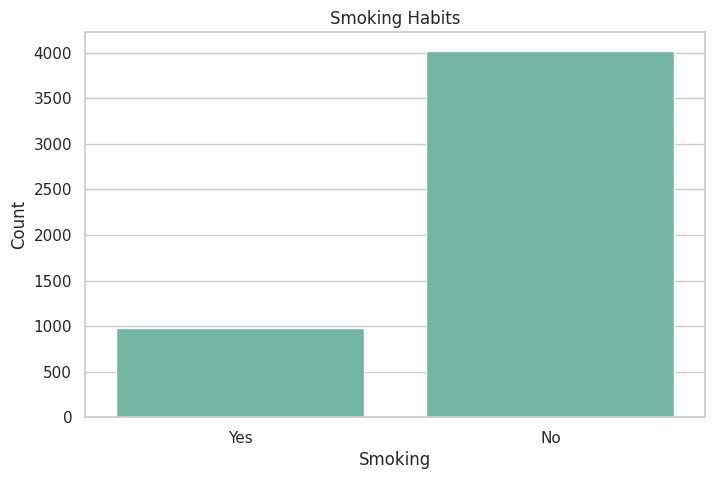

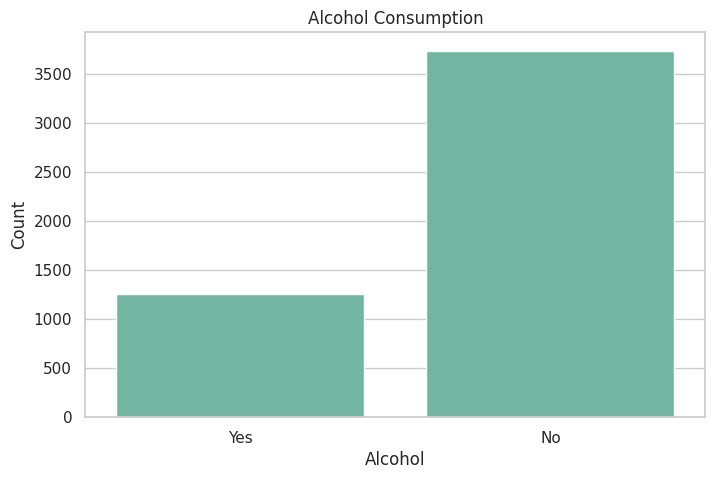

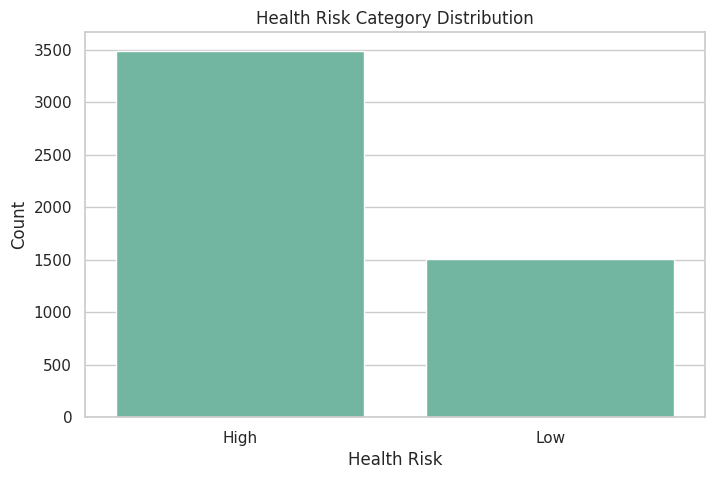

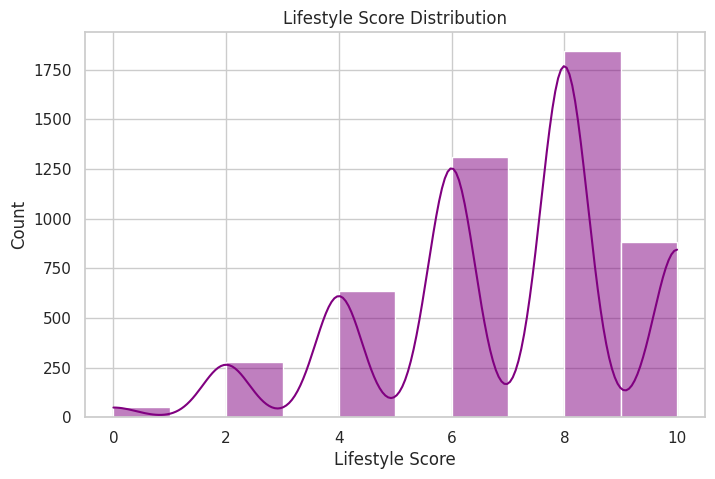

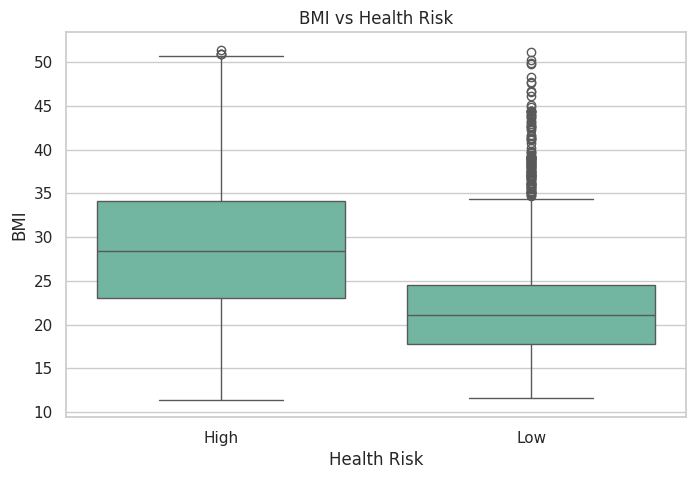

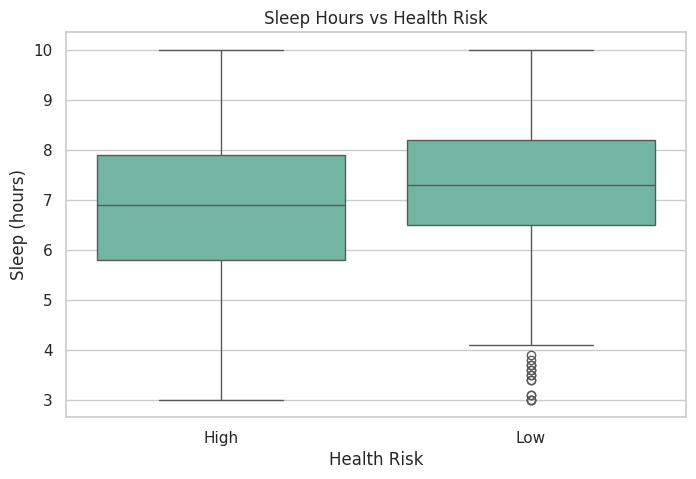

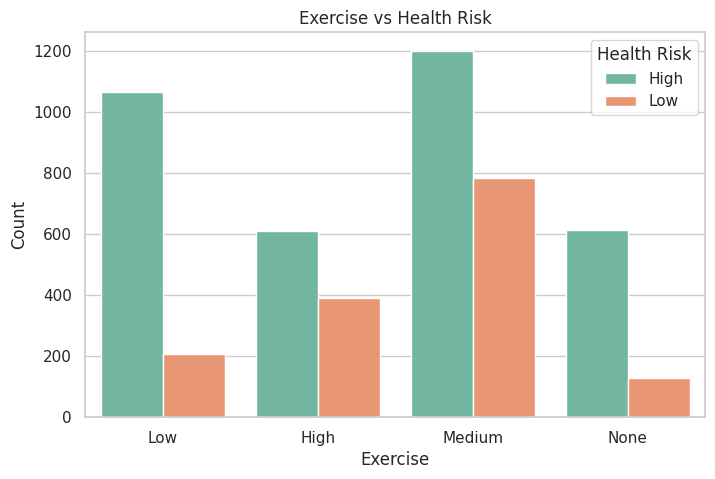

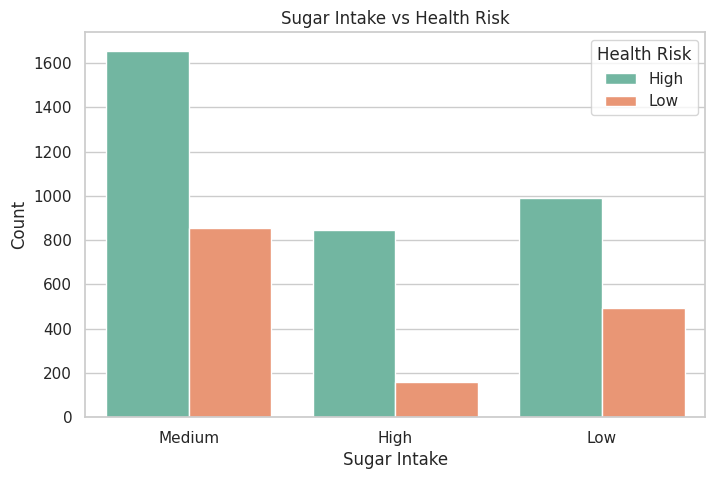

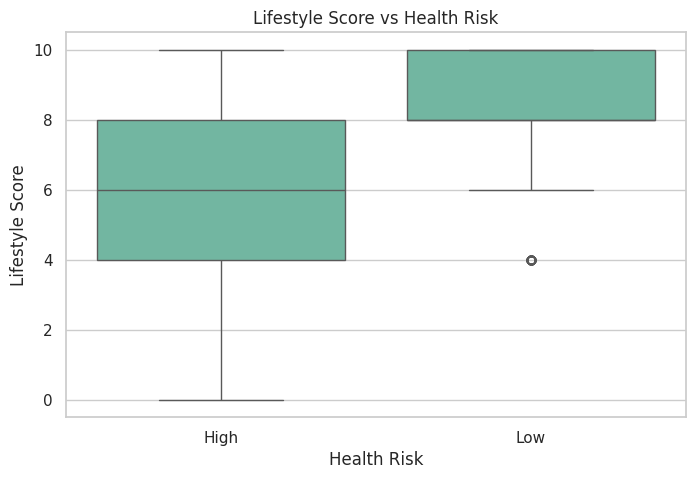

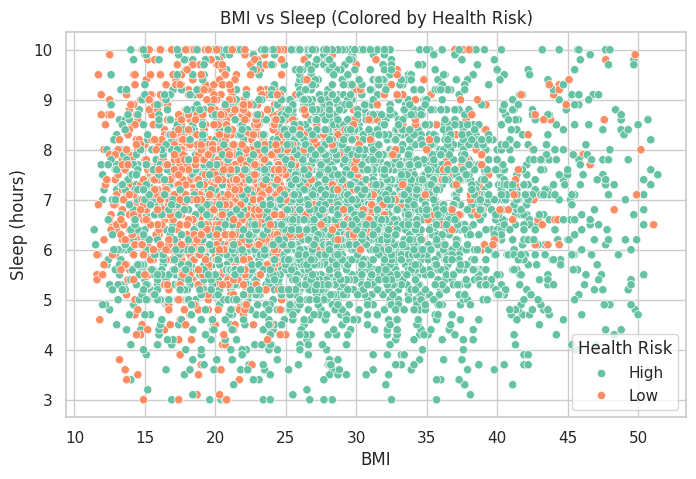

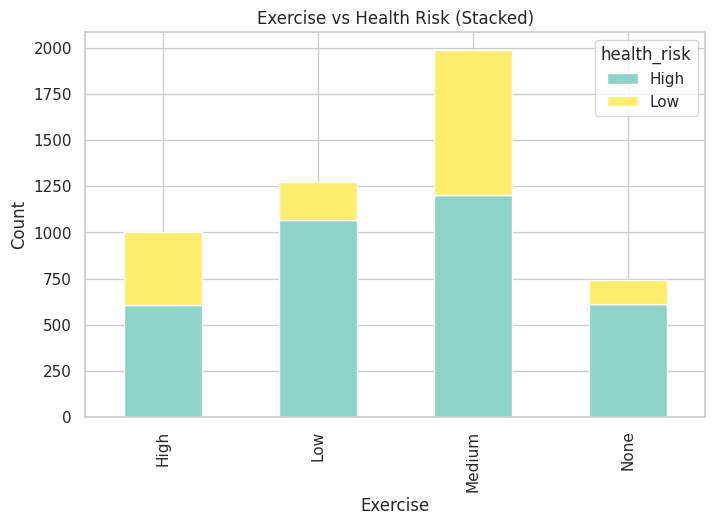

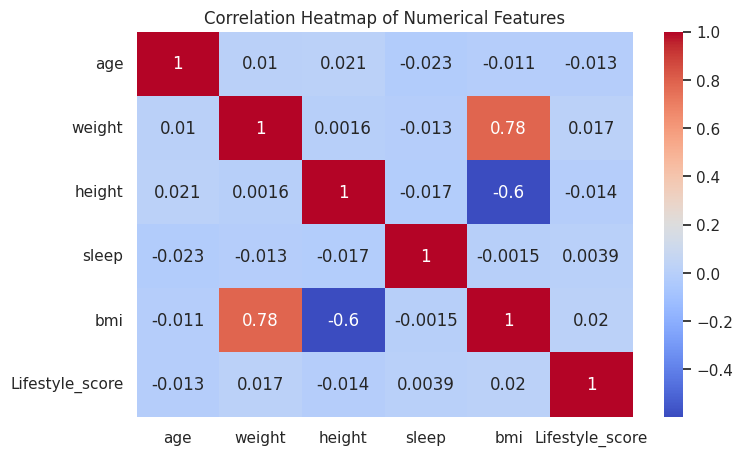

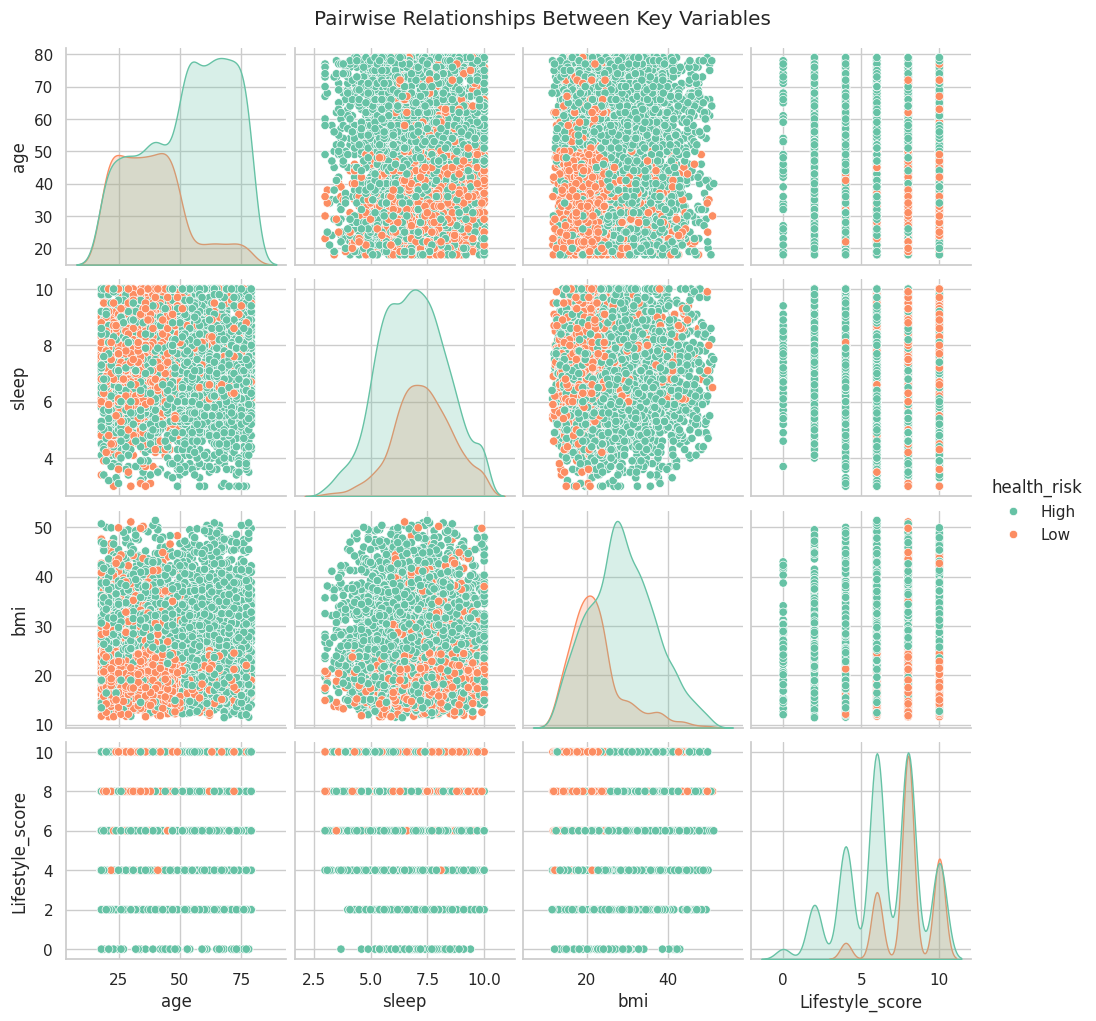

In [6]:
# EDA & VISUALIZATIONS

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (8, 5)

# -----------------------------
# UNIVARIATE ANALYSIS
# -----------------------------

# Age distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# BMI distribution
sns.histplot(df['bmi'], bins=20, kde=True, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Sleep hours distribution
sns.histplot(df['sleep'], bins=15, kde=True, color='teal')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep (hours)')
plt.ylabel('Count')
plt.show()

# Exercise frequency
sns.countplot(x='exercise', data=df, order=df['exercise'].value_counts().index)
plt.title('Exercise Frequency Count')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.show()

# Sugar intake
sns.countplot(x='sugar_intake', data=df, order=df['sugar_intake'].value_counts().index)
plt.title('Sugar Intake Count')
plt.xlabel('Sugar Intake')
plt.ylabel('Count')
plt.show()

# Smoking habits
sns.countplot(x='smoking', data=df)
plt.title('Smoking Habits')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

# Alcohol habits
sns.countplot(x='alcohol', data=df)
plt.title('Alcohol Consumption')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

# Health Risk
sns.countplot(x='health_risk', data=df, order=df['health_risk'].value_counts().index)
plt.title('Health Risk Category Distribution')
plt.xlabel('Health Risk')
plt.ylabel('Count')
plt.show()

# Lifestyle Score
sns.histplot(df['Lifestyle_score'], bins=10, kde=True, color='purple')
plt.title('Lifestyle Score Distribution')
plt.xlabel('Lifestyle Score')
plt.ylabel('Count')
plt.show()

# -----------------------------
#  BIVARIATE ANALYSIS
# -----------------------------

# BMI vs Health Risk
sns.boxplot(x='health_risk', y='bmi', data=df)
plt.title('BMI vs Health Risk')
plt.xlabel('Health Risk')
plt.ylabel('BMI')
plt.show()

# Sleep vs Health Risk
sns.boxplot(x='health_risk', y='sleep', data=df)
plt.title('Sleep Hours vs Health Risk')
plt.xlabel('Health Risk')
plt.ylabel('Sleep (hours)')
plt.show()

# Exercise vs Health Risk
sns.countplot(x='exercise', hue='health_risk', data=df)
plt.title('Exercise vs Health Risk')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.legend(title='Health Risk')
plt.show()

# Sugar intake vs Health Risk
sns.countplot(x='sugar_intake', hue='health_risk', data=df)
plt.title('Sugar Intake vs Health Risk')
plt.xlabel('Sugar Intake')
plt.ylabel('Count')
plt.legend(title='Health Risk')
plt.show()

# Lifestyle Score vs Health Risk
sns.boxplot(x='health_risk', y='Lifestyle_score', data=df)
plt.title('Lifestyle Score vs Health Risk')
plt.xlabel('Health Risk')
plt.ylabel('Lifestyle Score')
plt.show()

# -----------------------------
#  MULTIVARIATE ANALYSIS
# -----------------------------

# BMI vs Sleep colored by Health Risk
sns.scatterplot(x='bmi', y='sleep', hue='health_risk', data=df)
plt.title('BMI vs Sleep (Colored by Health Risk)')
plt.xlabel('BMI')
plt.ylabel('Sleep (hours)')
plt.legend(title='Health Risk')
plt.show()

# Lifestyle Score vs Health Risk by Exercise
cross_tab = pd.crosstab(df['exercise'], df['health_risk'])
cross_tab.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Exercise vs Health Risk (Stacked)')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.show()

# Correlation heatmap including Lifestyle Score
numeric_cols = ['age', 'weight', 'height', 'sleep', 'bmi', 'Lifestyle_score']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Pairplot of numerical variables
sns.pairplot(df[['age', 'sleep', 'bmi', 'Lifestyle_score', 'health_risk']], hue='health_risk')
plt.suptitle('Pairwise Relationships Between Key Variables', y=1.02)
plt.show()




# Conclusions

1. **BMI is a critical determinant of health risk.**

   - Individuals with higher BMI are more likely to fall into the High health risk category.

   - Maintaining BMI within the normal range is essential for overall health.

2. **Balanced sleep is important but uneven across the population.**

   - Most people fall into Low or Optimal sleep categories, while very few achieve High sleep durations.

   - Encouraging adequate sleep can improve wellness outcomes.

3. **Lifestyle habits significantly affect health risk.**

   - Exercise, sugar intake, smoking, and alcohol consumption collectively influence health.

   - Higher Lifestyle Scores are associated with healthier profiles and lower health risk.

4. **Profession-related patterns highlight targeted wellness opportunities.**

   - Certain professions show higher risk due to lifestyle habits (e.g., sedentary jobs or irregular schedules).

   - Tailored wellness programs can be developed for these groups.

5. **Preventive and informed lifestyle interventions are actionable.**

   - Reducing sugar intake, limiting smoking and alcohol, increasing exercise frequency, and maintaining a healthy BMI are actionable strategies.

   - Awareness programs and personalized recommendations can help individuals reduce their health risk.